# Pandas GroupBy

In [ ]:
1. Used to grouping the Data according to the Categories and apply functions on it.
2. Aggregation of the Data effectively.
3. Splitting the Data.

Objectives of GroupBy in Pandas:
    1. Splitting
    2. Applying
    3. Combining
    
GroupBy can be applied on Categorical Data mostly

In [1]:
import numpy as np, pandas as pd

In [ ]:
Group DataFrame using a mapper or by a Series of columns.


Syntax:
df.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

by        : mapping, function, str, or iterable (default = None)
axis      : int, (default = 0)
level     : If the axis is a MultiIndex (hierarchical), group by a particular level or levels
as_index  : For aggregated output, return object with group labels as the index (default=True)
sort      : Sort group keys (Get better performance by turning this off. 
                             Note this does not influence the order of observations 
                             within each group. groupby preserves the order of rows 
                             within each group.) (default = True)
group_keys: When calling apply, add group keys to index to identify pieces (default=True)
squeeze   : Reduce the dimensionality of the return type if possible, 
            otherwise return a consistent type

## GroupBy Functions

In [ ]:
1. df.groupby()               >> groupby object will create
2. df.groupby().groups        >> dict of group key and its index_values
3. df.groupby().groups().keys >> all the group keys
4. df.groupby().first()       >> First row of that particular group item
5. df.groupby().get_group()   >> To filter particular group from the grouped column


In [2]:
mv_df = pd.read_csv('movies_data.csv')
mv_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [5]:
mv_df['genre'].unique()         # finding unique values of 'genre_col'

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [14]:
group_obj = mv_df.groupby('genre')    # Groupby object created
group_obj

In [15]:
# df.groupby('col_name').groups

"""Dictionary of Key: Values

Key    >> Unique Value of particular Column
Value  >> row_index_values of that Key in entire column
"""
group_obj.groups            


{'Action': [3, 11, 12, 19, 20, 36, 37, 43, 44, 45, 75, 80, 82, 96, 100, 113, 118, 123, 129, 135, 138, 152, 163, 173, 177, 194, 196, 198, 235, 239, 240, 248, 261, 268, 276, 281, 296, 301, 312, 327, 349, 354, 366, 380, 385, 388, 391, 401, 403, 409, 411, 420, 433, 434, 437, 440, 452, 455, 469, 470, 488, 491, 502, 509, 515, 517, 529, 531, 532, 533, 534, 539, 552, 563, 567, 568, 570, 573, 581, 586, 591, 598, 610, 613, 619, 623, 633, 649, 653, 661, 671, 675, 683, 684, 685, 686, 691, 699, 701, 707, ...], 'Adventure': [7, 10, 14, 15, 54, 68, 71, 85, 101, 114, 120, 128, 133, 137, 140, 142, 164, 179, 204, 206, 214, 222, 224, 245, 271, 299, 309, 310, 328, 333, 336, 339, 359, 362, 368, 376, 393, 419, 424, 429, 445, 454, 479, 510, 520, 522, 537, 551, 555, 564, 576, 605, 629, 642, 658, 662, 698, 727, 754, 758, 794, 814, 852, 891, 898, 900, 909, 911, 932, 935, 936, 937, 943, 953, 975], 'Animation': [30, 55, 61, 64, 69, 81, 117, 126, 131, 147, 160, 167, 192, 193, 241, 256, 277, 294, 303, 305, 308, 332

In [18]:
group_obj.groups.keys()    # list of all unique items

dict_keys(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller', 'Western'])

In [20]:
# Another way to get all unique items of a column

mv_df['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [22]:
# Accessing Values of each item
# dict[key]

mv_df.groupby('genre').groups['Crime']

Int64Index([  0,   1,   2,   4,  21,  23,  28,  34,  40,  49,
            ...
            893, 907, 915, 920, 924, 927, 931, 950, 969, 978],
           dtype='int64', length=124)

In [30]:
for group in mv_df.groupby('genre').groups:
    print("Group Name:", group)
    print(mv_df.groupby('genre').groups[group])

Group Name: Action
Int64Index([  3,  11,  12,  19,  20,  36,  37,  43,  44,  45,
            ...
            884, 885, 896, 906, 908, 918, 954, 963, 967, 976],
           dtype='int64', length=136)
Group Name: Adventure
Int64Index([  7,  10,  14,  15,  54,  68,  71,  85, 101, 114, 120, 128, 133,
            137, 140, 142, 164, 179, 204, 206, 214, 222, 224, 245, 271, 299,
            309, 310, 328, 333, 336, 339, 359, 362, 368, 376, 393, 419, 424,
            429, 445, 454, 479, 510, 520, 522, 537, 551, 555, 564, 576, 605,
            629, 642, 658, 662, 698, 727, 754, 758, 794, 814, 852, 891, 898,
            900, 909, 911, 932, 935, 936, 937, 943, 953, 975],
           dtype='int64')
Group Name: Animation
Int64Index([ 30,  55,  61,  64,  69,  81, 117, 126, 131, 147, 160, 167, 192,
            193, 241, 256, 277, 294, 303, 305, 308, 332, 343, 357, 378, 381,
            386, 395, 414, 417, 443, 453, 461, 471, 487, 489, 494, 498, 501,
            512, 518, 541, 607, 617, 625, 656, 657, 6

In [31]:
mv_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [35]:
# getting unique values from 'content_rating'

mv_df.groupby('content_rating').groups.keys()

dict_keys(['APPROVED', 'G', 'GP', 'NC-17', 'NOT RATED', 'PASSED', 'PG', 'PG-13', 'R', 'TV-MA', 'UNRATED', 'X'])

In [39]:
mv_df.shape     # rows = 979, columns = 6

(979, 6)

In [40]:
mv_df.groupby(['genre','content_rating', 'title']).groups

# Groups three columns together and filter out its index_values

{('Action', 'APPROVED', 'From Russia with Love'): [896], ('Action', 'APPROVED', 'Goldfinger'): [563], ('Action', 'APPROVED', 'It's a Mad, Mad, Mad, Mad World'): [767], ('Action', 'G', 'The Longest Day'): [534], ('Action', 'GP', 'Kelly's Heroes'): [691], ('Action', 'NOT RATED', 'Battle Royale'): [573], ('Action', 'NOT RATED', 'The Dirty Dozen'): [531], ('Action', 'NOT RATED', 'The Magnificent Seven'): [491], ('Action', 'NOT RATED', 'The Treasure of the Sierra Madre'): [100], ('Action', 'PASSED', 'Forbidden Planet'): [619], ('Action', 'PG', 'Bullitt'): [908], ('Action', 'PG', 'Escape from Alcatraz'): [753], ('Action', 'PG', 'Indiana Jones and the Temple of Doom'): [764], ('Action', 'PG', 'Raiders of the Lost Ark'): [37], ('Action', 'PG', 'Star Trek II: The Wrath of Khan'): [586], ('Action', 'PG', 'Star Wars'): [19], ('Action', 'PG', 'Star Wars: Episode V - The Empire Strikes Back'): [12], ('Action', 'PG', 'Star Wars: Episode VI - Return of the Jedi'): [80], ('Action', 'PG', 'The Adventur

In [42]:
len(mv_df.groupby('genre'))    # total 16 items in 'genre' column

16

In [44]:
mv_df.groupby('genre').groups.keys()

dict_keys(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller', 'Western'])

In [46]:
""" 
To get the First Values of each grouped item
"""

mv_df.groupby('genre').first()  

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [47]:
mv_df.groupby('genre').first().shape[0]           

# matches with no.of unique values in 'genre' column

16

In [54]:
mv_df.groupby('genre').get_group('Comedy')     

# Filter 'Comedy' group in 'genre' column

,star_rating,title,content_rating,genre,duration,actors_list
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
48,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,PG,Comedy,95,"[u'Peter Sellers', u'George C. Scott', u'Sterl..."
52,8.5,The Great Dictator,APPROVED,Comedy,125,"[u'Charles Chaplin', u'Paulette Goddard', u'Ja..."
...,...,...,...,...,...,...
959,7.4,Deconstructing Harry,R,Comedy,96,"[u'Woody Allen', u'Judy Davis', u'Julia Louis-..."
960,7.4,The Way Way Back,PG-13,Comedy,103,"[u'Steve Carell', u'Toni Collette', u'Allison ..."
962,7.4,Driving Miss Daisy,PG,Comedy,99,"[u'Morgan Freeman', u'Jessica Tandy', u'Dan Ay..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."


In [58]:
# Comedy Movies DataFrame Created with new indexed

comedy_df = mv_df.groupby('genre').get_group('Comedy')     
comedy_df.reset_index(drop=True)

,star_rating,title,content_rating,genre,duration,actors_list
0,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
1,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
2,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
3,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,PG,Comedy,95,"[u'Peter Sellers', u'George C. Scott', u'Sterl..."
4,8.5,The Great Dictator,APPROVED,Comedy,125,"[u'Charles Chaplin', u'Paulette Goddard', u'Ja..."
...,...,...,...,...,...,...
151,7.4,Deconstructing Harry,R,Comedy,96,"[u'Woody Allen', u'Judy Davis', u'Julia Louis-..."
152,7.4,The Way Way Back,PG-13,Comedy,103,"[u'Steve Carell', u'Toni Collette', u'Allison ..."
153,7.4,Driving Miss Daisy,PG,Comedy,99,"[u'Morgan Freeman', u'Jessica Tandy', u'Dan Ay..."
154,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."


In [66]:
mv_df.groupby(['genre', 'content_rating']).get_group(('Comedy','PG'))
# filtered 'Comedy' from 'genre', 'PG' from 'content_rating'

,star_rating,title,content_rating,genre,duration,actors_list
48,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,PG,Comedy,95,"[u'Peter Sellers', u'George C. Scott', u'Sterl..."
97,8.4,The Sting,PG,Comedy,129,"[u'Paul Newman', u'Robert Redford', u'Robert S..."
208,8.1,Annie Hall,PG,Comedy,93,"[u'Woody Allen', u'Diane Keaton', u'Tony Rober..."
266,8.1,A Christmas Story,PG,Comedy,94,"[u'Peter Billingsley', u'Melinda Dillon', u'Da..."
275,8.1,Groundhog Day,PG,Comedy,101,"[u'Bill Murray', u'Andie MacDowell', u'Chris E..."
280,8.1,Young Frankenstein,PG,Comedy,106,"[u'Gene Wilder', u'Madeline Kahn', u'Marty Fel..."
304,8.0,Being There,PG,Comedy,130,"[u'Peter Sellers', u'Shirley MacLaine', u'Melv..."
516,7.8,Ghostbusters,PG,Comedy,105,"[u'Bill Murray', u'Dan Aykroyd', u'Sigourney W..."
524,7.8,Airplane!,PG,Comedy,88,"[u'Robert Hays', u'Julie Hagerty', u'Leslie Ni..."
535,7.8,Zelig,PG,Comedy,79,"[u'Woody Allen', u'Mia Farrow', u'Patrick Horg..."


In [46]:
mv_df
df.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [50]:
mv_df.groupby('genre', as_index=False).first()     # Not making the grouped col as index but will be the first col in DF

,genre,star_rating,title,content_rating,duration,actors_list
0,Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
1,Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
2,Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
3,Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
4,Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
5,Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
6,Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
8,Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
9,Film-Noir,8.3,The Third Man,NOT RATED,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


In [52]:
mv_df.groupby('genre', as_index=False, sort=False).first()  

# Not sorting the grouped col also not making it index but will be the first col in DF

,genre,star_rating,title,content_rating,duration,actors_list
0,Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
2,Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
3,Western,8.9,"The Good, the Bad and the Ugly",NOT RATED,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
4,Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
5,Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
6,Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
7,Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
8,Mystery,8.6,Rear Window,APPROVED,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
9,Horror,8.6,Psycho,R,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."


In [62]:
mv_df.groupby(['genre','content_rating'], axis=1, level= None, as_index=True, sort=False).first()  

# Not sorting the grouped col also not making it index but will be the first col in DF

AssertionError: len(index) != len(labels)

### Splitting Object using GroupBy

### GroupBy on Numeric Columns

In [ ]:
Task:
    PG content_rating movies Average Duration
    content_rating: PG
    Duration: avg

In [86]:
"""Task: Average 'Duration' of 'PG' content_rating
"""     
mv_df.groupby('content_rating').get_group('PG')['duration'].mean()

# Average 'Duration' of 'PG' Rating Movies

115.30081300813008

In [88]:
""" Average star_rating of PASSED content_rating and 'Comedy' genre """

mv_df.groupby(['content_rating', 'genre']).get_group(('PASSED','Comedy'))

,star_rating,title,content_rating,genre,duration,actors_list
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
358,8.0,The Lady Vanishes,PASSED,Comedy,96,"[u'Margaret Lockwood', u'Michael Redgrave', u'..."


In [90]:
#Average star_rating of PASSED content_rating and 'Comedy' genre

mv_df.groupby(['content_rating', 'genre']).get_group(('PASSED','Comedy'))['star_rating'].mean()

8.233333333333333

In [91]:
#Minimum star_rating of PASSED content_rating and 'Comedy' genre
mv_df.groupby(['content_rating','genre']).get_group(('PASSED','Comedy'))['star_rating'].min()

8.0

In [92]:
#Maximum star_rating of PASSED content_rating and 'Comedy' genre
mv_df.groupby(['content_rating','genre']).get_group(('PASSED','Comedy'))['star_rating'].max()

8.6

In [99]:
mv_df.groupby('genre')['duration'].mean()

# Average Duration of each grouped item in 'genre' column

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [105]:
mv_df.groupby('genre')['duration'].mean().sort_values()

# Sorted Average 'Duration' of each grouped item in 'genre' column

genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    131.844156
Adventure    134.840000
Western      136.666667
Name: duration, dtype: float64

Text(0.5, 1.0, 'Average Duration Comparision')

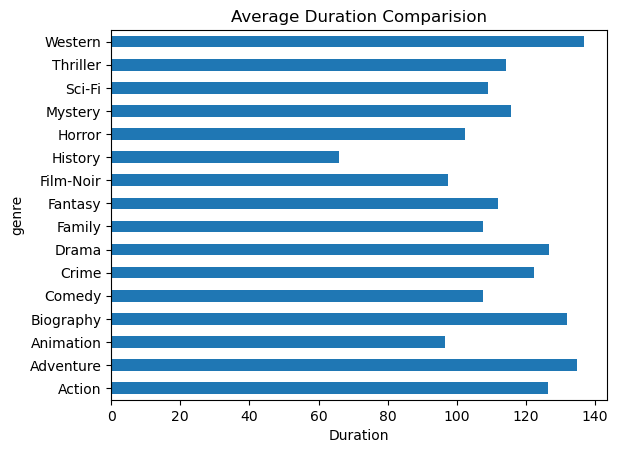

In [45]:
import matplotlib.pyplot as plt

x_df = mv_df.groupby('genre')['duration'].mean()

x_df.plot(kind = 'barh')
plt.xlabel('Duration')        # Labeling the x-axis
plt.title('Average Duration Comparision')

In [100]:
mv_df.groupby('genre')['star_rating'].min()
# Minimum Rating of Each grouped item

genre
Action       7.4
Adventure    7.4
Animation    7.4
Biography    7.4
Comedy       7.4
Crime        7.4
Drama        7.4
Family       7.8
Fantasy      7.7
Film-Noir    7.7
History      8.0
Horror       7.4
Mystery      7.4
Sci-Fi       7.7
Thriller     7.5
Western      7.6
Name: star_rating, dtype: float64

In [101]:
mv_df.groupby(['genre','content_rating'])['star_rating'].min()
# Minimum Rating of genre item and content_rating item together

genre    content_rating
Action   APPROVED          7.5
         G                 7.8
         GP                7.7
         NOT RATED         7.8
         PASSED            7.7
                          ... 
Western  APPROVED          8.3
         NOT RATED         8.1
         PG                7.9
         PG-13             8.6
         R                 7.6
Name: star_rating, Length: 95, dtype: float64

## loc Function

In [ ]:
Syntax:
    df.loc[condition]
    
Operators used for Condition:
    Comparision Operators ( <, >, ==, !=, <=, >=)
    Bitwise Operators     (&, |)
    

In [114]:
mv_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [116]:
mv_df.loc[:,:]     # all rows and cols

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [117]:
mv_df[:]        # all rows with all columns

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [123]:
"""
while using loc function
we are passing some conditions

condition is:
required rows   : 10,20,30,40
         columns: 'star_rating','content_rating','genre'
"""

mv_df.loc[[10,20,30,40],['star_rating','content_rating','genre']]


,star_rating,content_rating,genre
10,8.8,PG-13,Adventure
20,8.7,R,Action
30,8.6,PG,Animation
40,8.5,R,Crime


### Using Operators for Conditions

In [124]:
# Comparision Operator

mv_df['genre'] == 'Action'               # results bool values

0      False
1      False
2      False
3       True
4      False
       ...  
974    False
975    False
976     True
977    False
978    False
Name: genre, Length: 979, dtype: bool

In [126]:
# Bitwise Operators

(mv_df['genre']=='Action') & (mv_df['content_rating']=='PG')

# Action Movies with content_rating PG

0      False
1      False
2      False
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool

In [128]:
# records of Action Movies with content_rating PG

test_df1 = mv_df.loc[(mv_df['genre']=='Action') & (mv_df['content_rating']=='PG')]
test_df1

,star_rating,title,content_rating,genre,duration,actors_list
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
37,8.6,Raiders of the Lost Ark,PG,Action,115,"[u'Harrison Ford', u'Karen Allen', u'Paul Free..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
327,8.0,The Adventures of Robin Hood,PG,Action,102,"[u'Errol Flynn', u'Olivia de Havilland', u'Bas..."
420,7.9,The Man Who Would Be King,PG,Action,129,"[u'Sean Connery', u'Michael Caine', u'Christop..."
586,7.7,Star Trek II: The Wrath of Khan,PG,Action,113,"[u'William Shatner', u'Leonard Nimoy', u'DeFor..."
748,7.6,The Hunt for Red October,PG,Action,135,"[u'Sean Connery', u'Alec Baldwin', u'Scott Gle..."
753,7.6,Escape from Alcatraz,PG,Action,112,"[u'Clint Eastwood', u'Patrick McGoohan', u'Rob..."
764,7.6,Indiana Jones and the Temple of Doom,PG,Action,118,"[u'Harrison Ford', u'Kate Capshaw', u'Jonathan..."


In [129]:
test_df1.shape    # total 11 records

(11, 6)

In [135]:
# Either Action movies or PG-13 Content rating Movies

test_df2 = mv_df.loc[(mv_df['genre']=='Action') | (mv_df['content_rating']=='PG-13')]
print(test_df2.shape)
test_df2

(281, 6)


,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
...,...,...,...,...,...,...
965,7.4,Limitless,PG-13,Mystery,105,"[u'Bradley Cooper', u'Anna Friel', u'Abbie Cor..."
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
967,7.4,The Rock,R,Action,136,"[u'Sean Connery', u'Nicolas Cage', u'Ed Harris']"
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."


In [148]:
"""
Task:
Both Comedy and Animation Movies with Duration more than 100 minutes
"""

test_df3 = mv_df.loc[((mv_df['genre'] == 'Comedy') | (mv_df['genre']=='Animation')) 
                     & (mv_df['duration'] >= 100)]
test_df3

,star_rating,title,content_rating,genre,duration,actors_list
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
52,8.5,The Great Dictator,APPROVED,Comedy,125,"[u'Charles Chaplin', u'Paulette Goddard', u'Ja..."
60,8.5,3 Idiots,PG-13,Comedy,170,"[u'Aamir Khan', u'Madhavan', u'Mona Singh']"
66,8.4,Munna Bhai M.B.B.S.,NOT RATED,Comedy,156,"[u'Sunil Dutt', u'Sanjay Dutt', u'Arshad Warsi']"
...,...,...,...,...,...,...
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
952,7.4,Pirate Radio,R,Comedy,117,"[u'Philip Seymour Hoffman', u'Bill Nighy', u'N..."
956,7.4,Manhattan Murder Mystery,PG,Comedy,104,"[u'Woody Allen', u'Diane Keaton', u'Jerry Adler']"
960,7.4,The Way Way Back,PG-13,Comedy,103,"[u'Steve Carell', u'Toni Collette', u'Allison ..."


In [150]:
"""
Task:
Both Comedy and Animation Movies with Duration more than 100 minutes
and start_rating between 7 to 8
"""

test_df4 = mv_df.loc[((mv_df['genre'] == 'Comedy') | (mv_df['genre']=='Animation')) 
                     & (mv_df['duration'] >= 100)
                    & ((mv_df['star_rating']>7) & (mv_df['star_rating']<8) )]
test_df4

,star_rating,title,content_rating,genre,duration,actors_list
394,7.9,Birdman: Or (The Unexpected Virtue of Ignorance),R,Comedy,119,"[u'Michael Keaton', u'Zach Galifianakis', u'Ed..."
395,7.9,Big Hero 6,PG,Animation,102,"[u'Ryan Potter', u'Scott Adsit', u'Jamie Chung']"
417,7.9,Cowboy Bebop: The Movie,R,Animation,115,"[u'Beau Billingslea', u'Melissa Fahn', u'Nicho..."
435,7.9,Do the Right Thing,R,Comedy,120,"[u'Danny Aiello', u'Ossie Davis', u'Ruby Dee']"
458,7.9,Hot Fuzz,R,Comedy,121,"[u'Simon Pegg', u'Nick Frost', u'Martin Freeman']"
...,...,...,...,...,...,...
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
952,7.4,Pirate Radio,R,Comedy,117,"[u'Philip Seymour Hoffman', u'Bill Nighy', u'N..."
956,7.4,Manhattan Murder Mystery,PG,Comedy,104,"[u'Woody Allen', u'Diane Keaton', u'Jerry Adler']"
960,7.4,The Way Way Back,PG-13,Comedy,103,"[u'Steve Carell', u'Toni Collette', u'Allison ..."


In [152]:
"""
Task:
Both Comedy and Animation Movies with Duration more than 100 minutes
and start_rating between 7 to 8 
with either PG  or R content_rated movies
"""

test_df5 = mv_df.loc[((mv_df['genre'] == 'Comedy') | (mv_df['genre']=='Animation')) 
                     & (mv_df['duration'] >= 100)
                     & ((mv_df['star_rating']>7) & (mv_df['star_rating']<8))
                     & ((mv_df['content_rating']=='PG')|(mv_df['content_rating']=='R')) ]
print(test_df5.shape)
test_df5

(53, 6)


,star_rating,title,content_rating,genre,duration,actors_list
394,7.9,Birdman: Or (The Unexpected Virtue of Ignorance),R,Comedy,119,"[u'Michael Keaton', u'Zach Galifianakis', u'Ed..."
395,7.9,Big Hero 6,PG,Animation,102,"[u'Ryan Potter', u'Scott Adsit', u'Jamie Chung']"
417,7.9,Cowboy Bebop: The Movie,R,Animation,115,"[u'Beau Billingslea', u'Melissa Fahn', u'Nicho..."
435,7.9,Do the Right Thing,R,Comedy,120,"[u'Danny Aiello', u'Ossie Davis', u'Ruby Dee']"
458,7.9,Hot Fuzz,R,Comedy,121,"[u'Simon Pegg', u'Nick Frost', u'Martin Freeman']"
462,7.9,Down by Law,R,Comedy,107,"[u'Tom Waits', u'John Lurie', u'Roberto Benigni']"
471,7.8,Tangled,PG,Animation,100,"[u'Mandy Moore', u'Zachary Levi', u'Donna Murp..."
475,7.8,Silver Linings Playbook,R,Comedy,122,"[u'Bradley Cooper', u'Jennifer Lawrence', u'Ro..."
483,7.8,Withnail & I,R,Comedy,107,"[u'Richard E. Grant', u'Paul McGann', u'Richar..."
494,7.8,The Lego Movie,PG,Animation,100,"[u'Chris Pratt', u'Will Ferrell', u'Elizabeth ..."


In [157]:
"""
Task:
Both Comedy and Animation Movies with Duration more than 100 minutes
and start_rating between 7 to 8 
with either PG  or R content_rated movies
and sort by duration
"""

test_df5 = mv_df.loc[((mv_df['genre'] == 'Comedy') | (mv_df['genre']=='Animation')) 
                     & (mv_df['duration'] >= 100)
                     & ((mv_df['star_rating']>7) & (mv_df['star_rating']<8))
                     & ((mv_df['content_rating']=='PG')|(mv_df['content_rating']=='R')) ]
test_df5.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
471,7.8,Tangled,PG,Animation,100,"[u'Mandy Moore', u'Zachary Levi', u'Donna Murp..."
657,7.7,Coraline,PG,Animation,100,"[u'Dakota Fanning', u'Teri Hatcher', u'John Ho..."
494,7.8,The Lego Movie,PG,Animation,100,"[u'Chris Pratt', u'Will Ferrell', u'Elizabeth ..."
597,7.7,50/50,R,Comedy,100,"[u'Joseph Gordon-Levitt', u'Seth Rogen', u'Ann..."
519,7.8,The Hangover,R,Comedy,100,"[u'Zach Galifianakis', u'Bradley Cooper', u'Ju..."
518,7.8,Wreck-It Ralph,PG,Animation,101,"[u'John C. Reilly', u'Jack McBrayer', u'Jane L..."
565,7.8,The Sandlot,PG,Comedy,101,"[u'Tom Guiry', u'Mike Vitar', u'Patrick Renna']"
752,7.6,Garden State,R,Comedy,102,"[u'Zach Braff', u'Peter Sarsgaard', u'Natalie ..."
395,7.9,Big Hero 6,PG,Animation,102,"[u'Ryan Potter', u'Scott Adsit', u'Jamie Chung']"
664,7.7,Frozen,PG,Animation,102,"[u'Kristen Bell', u'Idina Menzel', u'Jonathan ..."


In [159]:
"""
Task:
Both Comedy and Animation Movies with Duration more than 100 minutes
and start_rating between 7 to 8 
with either PG  or R content_rated movies
and sort by duration
FInally get those movie names
"""

test_df5 = mv_df.loc[((mv_df['genre'] == 'Comedy') | (mv_df['genre']=='Animation')) 
                     & (mv_df['duration'] >= 100)
                     & ((mv_df['star_rating']>7) & (mv_df['star_rating']<8))
                     & ((mv_df['content_rating']=='PG')|(mv_df['content_rating']=='R')), ['title']]
test_df5


,title
394,Birdman: Or (The Unexpected Virtue of Ignorance)
395,Big Hero 6
417,Cowboy Bebop: The Movie
435,Do the Right Thing
458,Hot Fuzz
462,Down by Law
471,Tangled
475,Silver Linings Playbook
483,Withnail & I
494,The Lego Movie


### df.isin()

In [163]:
"""
Task:
Comedy, Action and Animation Movies

"""

test_df6 = mv_df.loc[mv_df['genre'].isin(['Comedy', 'Action', 'Animation'])]
test_df6

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."
...,...,...,...,...,...,...
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
967,7.4,The Rock,R,Action,136,"[u'Sean Connery', u'Nicolas Cage', u'Ed Harris']"
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."


In [167]:
"""
Task:
Both Comedy and Animation Movies with Duration more than 100 minutes
and start_rating between 7 to 8 
with either PG  or R content_rated movies
and sort by duration
FInally get those movie names
"""

# Using df.isin()

test_df5 = mv_df.loc[(mv_df['genre'].isin(['Comedy','Animation']))
                     & (mv_df['duration'] >= 100)
                     & ((mv_df['star_rating']>7) & (mv_df['star_rating']<8))
                     & (mv_df['content_rating'].isin(['PG','R'])), ['title']]
test_df5


,title
394,Birdman: Or (The Unexpected Virtue of Ignorance)
395,Big Hero 6
417,Cowboy Bebop: The Movie
435,Do the Right Thing
458,Hot Fuzz
462,Down by Law
471,Tangled
475,Silver Linings Playbook
483,Withnail & I
494,The Lego Movie


In [172]:
mv_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [174]:
mv_df['genre'].isin(['Action','Adventure','PG'])

0      False
1      False
2      False
3       True
4      False
       ...  
974    False
975     True
976     True
977    False
978    False
Name: genre, Length: 979, dtype: bool

In [3]:
mv_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Task:
    Display all the Titles acted by 'Robert De Niro'

In [13]:
s1 = mv_df['actors_list']         # Extracted Series of the Col 'actors_list'
""" As the Datatype of Each item in the Series is object(string)
We can perform String Operations.
To filter the combo_list of Robert De Niro 
apply count() function upon each item of the series
"""
robert_list = [i for i in s1 if i.count('Robert De Niro')>=1]     # Filter the combo list of Robert De Niro

"""Now generate new DataFrame whith above condition """
robert_mv_df = mv_df.loc[mv_df['actors_list'].isin(robert_list)]
robert_mv_df                   # DataFrame of Movies acted by Robert De Niro

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
18,8.7,Goodfellas,R,Biography,146,"[u'Robert De Niro', u'Ray Liotta', u'Joe Pesci']"
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
92,8.4,Taxi Driver,R,Crime,113,"[u'Robert De Niro', u'Jodie Foster', u'Cybill ..."
124,8.3,Raging Bull,R,Biography,129,"[u'Robert De Niro', u'Cathy Moriarty', u'Joe P..."
135,8.3,Heat,R,Action,170,"[u'Al Pacino', u'Robert De Niro', u'Val Kilmer']"
156,8.2,Casino,R,Biography,178,"[u'Robert De Niro', u'Sharon Stone', u'Joe Pes..."
166,8.2,The Deer Hunter,R,Drama,182,"[u'Robert De Niro', u'Christopher Walken', u'J..."
321,8.0,Brazil,R,Sci-Fi,132,"[u'Jonathan Pryce', u'Kim Greist', u'Robert De..."
383,8.0,The Untouchables,R,Crime,119,"[u'Kevin Costner', u'Sean Connery', u'Robert D..."


In [21]:
speeds_df = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
speeds_df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [39]:
speeds_df.groupby('order',sort = False).first()

,class,max_speed
order,,
Falconiformes,bird,389.0
Psittaciformes,bird,24.0
Carnivora,mammal,80.2
Primates,mammal,NaN
